### Notebook Purpose

Redo this viz from TheAnalyst

![](https://theanalyst.com/wp-content/uploads/2022/05/full-back-touches-thirds-since-2012-1024x461.jpg)

https://theanalyst.com/eu/2022/05/charting-the-rise-of-the-full-back/

### Why?

It's a clean, great looking viz. But I think the differences between seasons don't show clearly on those small multiples. I kind of have to parse every single value to get a good idea of the changes across seasons.  
That change should be the main point I think.  
I think a viz that could show that and be understood intuitively at a glance could be an improvement.

### Imports & Settings

In [1]:
import warnings

import matplotlib as mpl
import matplotlib.patheffects as path_effects

# standard matplotlib imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from highlight_text import fig_text

from mplsoccer.pitch import Pitch
#from themepy import Theme

warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

### Data Processing

In [2]:
data = pd.DataFrame(
    [
        [31.3, 30.3, 30.5, 30.7, 29.5, 28.7, 27.8, 28.2, 29.0, 30.0],
        [46.0, 46.6, 46.0, 44.5, 44.0, 45.1, 45.7, 44.9, 44.3, 43.2],
        [22.7, 23.1, 23.5, 24.8, 26.5, 26.3, 26.6, 26.9, 26.7, 26.8],
    ],
    index=["DEF", "MID", "ATT"],
).T

In [3]:
data

,DEF,MID,ATT
0,31.3,46.0,22.7
1,30.3,46.6,23.1
2,30.5,46.0,23.5
3,30.7,44.5,24.8
4,29.5,44.0,26.5
5,28.7,45.1,26.3
6,27.8,45.7,26.6
7,28.2,44.9,26.9
8,29.0,44.3,26.7
9,30.0,43.2,26.8


In [4]:
colors = ["#ffd77a", "#ffb47a", "#ff7a7a"]

In [5]:
def path_effect_stroke(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]

def _get_diff_string(num):
    if num == 0:
        return "±0%"
    elif num < 0:
        return f"{round(num, 1)}%"
    else:
        return f"+{round(num, 1)}%"

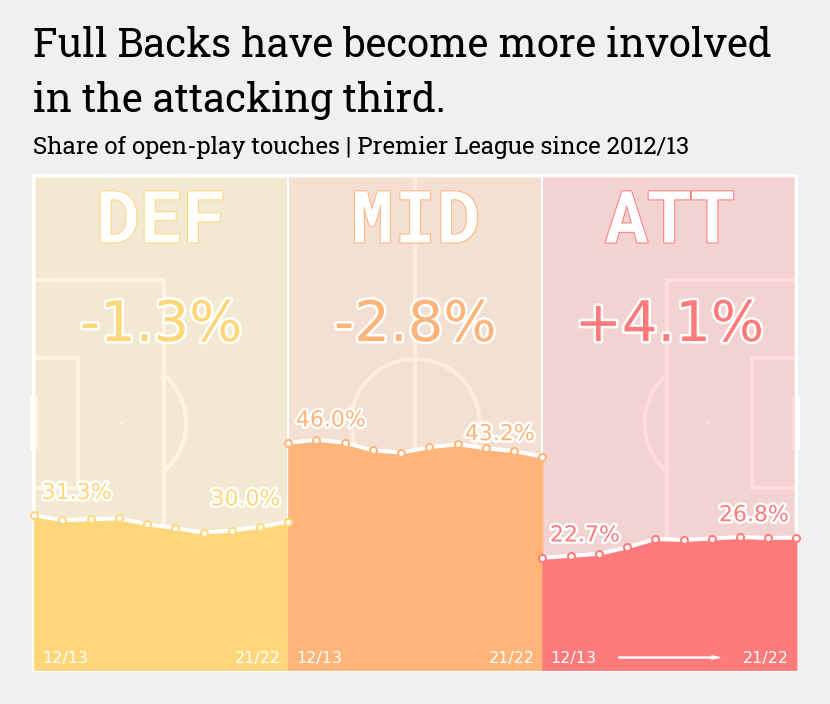

In [6]:
#theme = Theme("")
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(6.4, 4.8))

# The Opta Pitch has dimensions of 100x100 - perfect for our use.
pitch = Pitch(pitch_type="opta", line_color="w", linewidth=2).draw(ax=ax)

pe_white = path_effect_stroke(linewidth=2.5, foreground="w")

third_bounds = np.array([0, 33.3333, 66.6666, 100])
third_centers = third_bounds[1:] - third_bounds[1] / 2

for x, s, c in zip(third_centers, data.columns, colors):
    pe = path_effect_stroke(linewidth=1, foreground=c)
    ax.text(
        x=x,
        y=97.5,
        s=s,
        color="w",
        fontweight="bold",
        fontname="Roboto Mono",
        fontsize=36,
        ha="center",
        va="top",
        path_effects=pe,
    )

for x, c in zip(third_bounds[:-1], colors):
    # light colored background for each third
    rect = plt.Rectangle(
        (x, 0), width=33.3333, height=100, linewidth=1, fc=c, ec=None, alpha=0.25
    )
    ax.add_patch(rect)
    
    # white outline around thirds
    rect = plt.Rectangle(
        (x, 0), width=33.3333, height=100, linewidth=1, fc="None", ec="w"
    )
    ax.add_patch(rect)


for c, col, _from, _to, center in zip(
    colors, data.columns, third_bounds[:-1], third_bounds[1:], third_centers
):
    xs = np.linspace(_from, _to, 10)
    ys = data[col].values
    ax.fill_between(xs, ys, color=c, alpha=1)
    
    # all seasons values for one third
    ax.plot(
        xs,
        ys,
        "o-",
        markerfacecolor="w",
        color="w",
        markeredgecolor=c,
        markersize=3.5,
        lw=2,
    )

    # first season value
    ax.text(
        x=xs[0] + 1,
        y=ys[0] + 2.5,
        s=f"{ys[0]}%",
        ha="left",
        va="bottom",
        fontsize=11,
        color=c,
        path_effects=pe_white,
    )
    
    # last season value
    ax.text(
        x=xs[-1] - 1,
        y=ys[-1] + 2.5,
        s=f"{ys[-1]}%",
        ha="right",
        va="bottom",
        fontsize=11,
        color=c,
        path_effects=pe_white,
    )

    pe = path_effect_stroke(linewidth=1, foreground=c)
    
    # Difference between first and last season
    diff = ys[-1] - ys[0]
    ax.text(
        x=center,
        y=66.6,
        s=_get_diff_string(diff),
        ha="center",
        fontsize=28,
        color=c,
        path_effects=pe_white,
    )

    # Season Annotations
    ax.text(
        x=xs[0] + 1, y=0.75, s="12/13", ha="left", va="bottom", fontsize=8, color="w"
    )
    ax.text(
        x=xs[-1] - 1, y=0.75, s="21/22", ha="right", va="bottom", fontsize=8, color="w"
    )


ax.arrow(
    xs[0] + 10,
    2.5,
    dx=(xs[-1] - 10) - (xs[0] + 10),
    dy=0,
    width=0.25,
    length_includes_head=True,
    color="w",
)


title = fig_text(
    x=0.1,
    y=1.05,
    s="Full Backs have become more involved\n"
    "in the attacking third.\n"
    "<Share of open-play touches | Premier League since 2012/13>",
    fontname="Roboto Slab",
    fontsize=20,
    vsep=8,
    highlight_textprops=[{"fontsize": 12}],
)

plt.show()
#plt.tight_layout()

fig.savefig("plots/athletic_fullbacks_do_over.png", bbox_inches="tight", dpi=200)